### 1. Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 2. Loading the raw data

#### Load the data from a .csv in the same folder

In [2]:
dataset=pd.read_csv("C://Users//Shravya//Downloads//linear.csv.csv")
dataset

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


#### Let's explore the top 5 rows of the df


In [3]:
dataset.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### 3. Exploring the descriptive statistics of the variables
-  Descriptive statistics are very useful for initial exploration of the variables
- By default, only descriptives for the numerical variables are shown
- To include the categorical ones, you should specify this with an argument

In [4]:
dataset.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
dataset.rename(columns={'Engine Type':'Engine_type'},inplace=True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine_type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


### Dealing with missing values

#### 4. Find the missing values from the data if any
- data.isnull() # shows a df with the information whether a data point is null. 
- Since True = the data point is missing, while False = the data point is not missing, we can sum them.
- This will give us the total number of missing values feature-wise.

In [7]:
dataset.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine_type,Registration,Year,Model
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False,False


In [8]:
dataset.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine_type       0
Registration      0
Year              0
Model             0
dtype: int64

#### 5. Let's simply drop all missing values
Note: This is not always recommended, however, when we remove less than 5% of the data, it is okay

In [9]:
dataset=dataset.dropna(axis=0)

#### 6. Let's check the descriptives without the missing values


In [10]:
dataset.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine_type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Exploring the PDFs for Numerical Variables in the DataFrame

#### 7. A great step in the data exploration is to display the probability distribution function (PDF) of a variable
- The PDF will show us how that variable is distributed 
- This makes it very easy to spot anomalies, such as outliers
- The PDF is often the basis on which we decide whether we want to transform a feature

C:\Users\shravya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


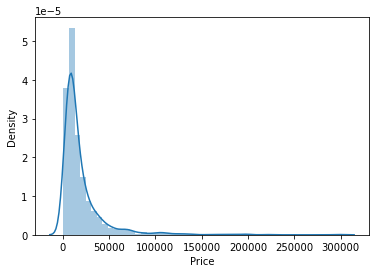

count      4025.000000
mean      19552.308065
std       25815.734988
min         600.000000
25%        6999.000000
50%       11500.000000
75%       21900.000000
max      300000.000000
Name: Price, dtype: float64

In [11]:
sns.distplot(dataset['Price'])
plt.show()
dataset['Price'].describe()

In [12]:
##looking at the distplot we have outliers in price column

### Dealing with outliers
Hint: Use IQR or Z Score

#### 8A. Identify the Outliers which are presented in `Price` Column

#### 8B. Remove the Outliers which are presented in `Price` Column

In [13]:
iqr = 1.5 * (np.percentile(dataset['Price'], 75) - np.percentile(dataset['Price'], 25)) 
dataset.drop(dataset[dataset['Price'] > (iqr + np.percentile(dataset['Price'], 75))].index, inplace=True) 
dataset.drop(dataset[dataset['Price'] < (np.percentile(dataset['Price'], 25) - iqr)].index, inplace=True)



C:\Users\shravya\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\shravya\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### 8C. Again Check the Distribution for `Price` Column and say something about distribution plot

C:\Users\shravya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


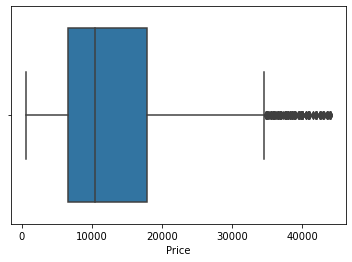

count     3670.000000
mean     13338.795207
std       9581.344371
min        600.000000
25%       6650.000000
50%      10500.000000
75%      17900.000000
max      44000.000000
Name: Price, dtype: float64

In [14]:
sns.boxplot(dataset['Price'])
plt.show()
dataset['Price'].describe()

In [15]:
## After removing outliers the distribution is changed.but there are some outliers

#### 9A. Same identify and remove the outliers in `Milage` column

C:\Users\shravya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


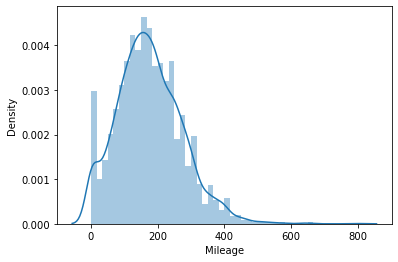

In [16]:
sns.distplot(dataset['Mileage'])
plt.show()

In [17]:
# there are outliers in mileage. we will remove those and check the distribution

In [18]:
iqr = 1.5 * (np.percentile(dataset['Mileage'], 75) - np.percentile(dataset['Mileage'], 25)) 
dataset.drop(dataset[dataset['Mileage'] > (iqr + np.percentile(dataset['Mileage'], 75))].index, inplace=True) 
dataset.drop(dataset[dataset['Mileage'] < (np.percentile(dataset['Mileage'], 25) - iqr)].index, inplace=True)

C:\Users\shravya\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\shravya\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### 9B. Check the distribution after deleting the outliers in `milage` column and say something about distribution.

C:\Users\shravya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


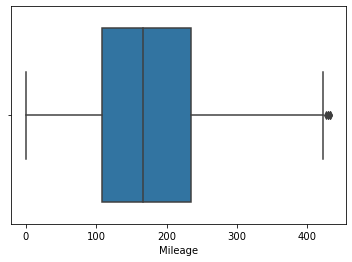

In [19]:
sns.boxplot(dataset['Mileage'])
plt.show()

In [20]:
#after removing outliers distribution changed

#### 10A. Identify and remove the outliers from `EngineV` column



C:\Users\shravya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


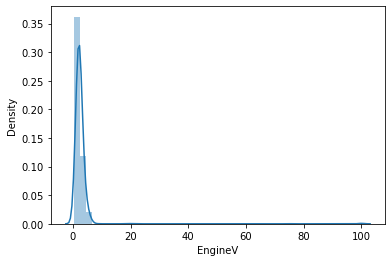

In [21]:
sns.distplot(dataset['EngineV'])
plt.show()

#### 10B. Ckeck the distribution plot after deleting the outliers

In [22]:
iqr = 1.5 * (np.percentile(dataset['EngineV'], 75) - np.percentile(dataset['EngineV'], 25)) 
dataset.drop(dataset[dataset['EngineV'] > (iqr + np.percentile(dataset['EngineV'], 75))].index, inplace=True) 
dataset.drop(dataset[dataset['EngineV'] < (np.percentile(dataset['EngineV'], 25) - iqr)].index, inplace=True)

C:\Users\shravya\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\shravya\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
iqr

1.4999999999999996

C:\Users\shravya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


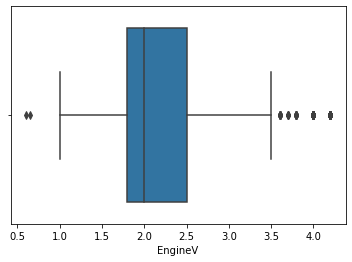

In [24]:
sns.boxplot(dataset['EngineV'])
plt.show()

In [25]:
#data distribution is changed after removing outliers


C:\Users\shravya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


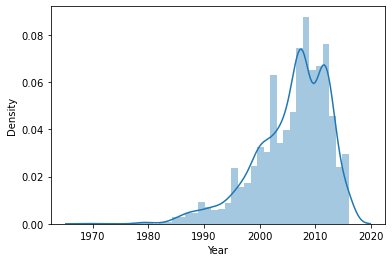

In [26]:
sns.distplot(dataset['Year'])
plt.show()

In [27]:
iqr = 1.5 * (np.percentile(dataset['Year'], 75) - np.percentile(dataset['Year'], 25)) 
dataset.drop(dataset[dataset['Year'] > (iqr + np.percentile(dataset['Year'], 75))].index, inplace=True) 
dataset.drop(dataset[dataset['Year'] < (np.percentile(dataset['Year'], 25) - iqr)].index, inplace=True)

C:\Users\shravya\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\shravya\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


C:\Users\shravya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


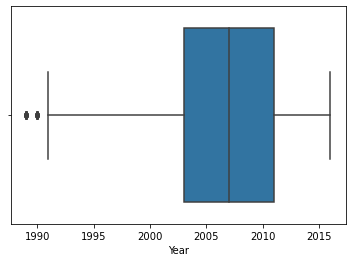

In [28]:
sns.boxplot(dataset['Year'])
plt.show()

In [29]:
dataset.tail(10)

,Brand,Price,Body,Mileage,EngineV,Engine_type,Registration,Year,Model
4332,Renault,6750.0,van,155,1.5,Diesel,yes,2012,Kangoo
4333,Renault,7000.0,van,210,1.5,Diesel,yes,2005,Kangoo
4334,BMW,12090.0,hatch,145,1.6,Petrol,yes,2010,116
4335,BMW,27900.0,sedan,38,2.0,Petrol,yes,2013,320
4336,Renault,2100.0,vagon,237,1.9,Diesel,no,2001,Laguna
4337,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,Megane
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4344,Volkswagen,13500.0,van,124,2.0,Diesel,yes,2013,T5 (Transporter)


In [30]:
#As we can see, the indices of the dataframe show all the dataincluding the observations we have removed. But we want to only descibe the data only for analysis. So we will reset the indexes to completely forget the old index.

In [31]:
data_cleaned = dataset.reset_index(drop=True)

In [32]:

data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine_type,Registration,Year,Model
count,3346,3346.000000,3346,3346.00000,3346.000000,3346,3346,3346.000000,3346
unique,7,NaN,6,NaN,NaN,4,2,NaN,232
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,814,NaN,1296,NaN,NaN,1575,2989,NaN,175
mean,NaN,13096.091022,NaN,170.54214,2.229029,NaN,NaN,2006.214585,NaN
std,NaN,9142.891810,NaN,91.18809,0.653628,NaN,NaN,5.862651,NaN
min,NaN,800.000000,NaN,0.00000,0.600000,NaN,NaN,1989.000000,NaN
25%,NaN,6800.000000,NaN,107.00000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,10500.000000,NaN,165.00000,2.000000,NaN,NaN,2007.000000,NaN
75%,NaN,17500.000000,NaN,232.00000,2.500000,NaN,NaN,2011.000000,NaN


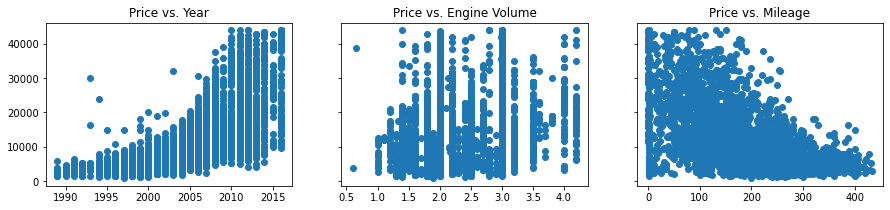

C:\Users\shravya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


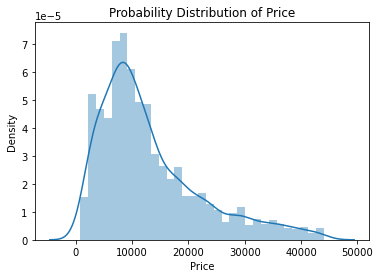

In [33]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15, 3))
ax1.scatter(y=data_cleaned['Price'], x=data_cleaned['Year'])
ax1.set_title('Price vs. Year')
ax2.scatter(y=data_cleaned['Price'], x=data_cleaned['EngineV'])
ax2.set_title('Price vs. Engine Volume')
ax3.scatter(y=data_cleaned['Price'], x=data_cleaned['Mileage'])
ax3.set_title('Price vs. Mileage')
plt.show()

sns.distplot(data_cleaned['Price'])
plt.title('Probability Distribution of Price')
plt.show()

In [34]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['Log Price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine_type,Registration,Year,Model,Log Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
4,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6,9.560997


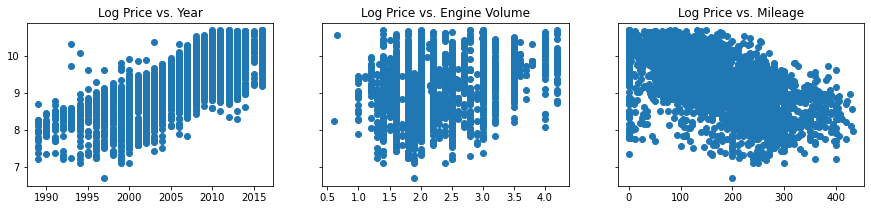

In [35]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15, 3))
ax1.scatter(y=data_cleaned['Log Price'], x=data_cleaned['Year'])
ax1.set_title('Log Price vs. Year')
ax2.scatter(y=data_cleaned['Log Price'], x=data_cleaned['EngineV'])
ax2.set_title('Log Price vs. Engine Volume')
ax3.scatter(y=data_cleaned['Log Price'], x=data_cleaned['Mileage'])
ax3.set_title('Log Price vs. Mileage')
plt.show()

C:\Users\shravya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


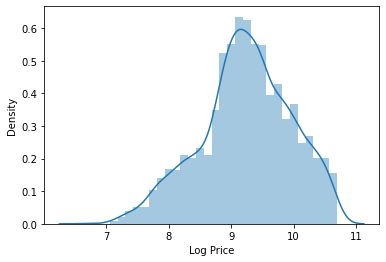

In [36]:
sns.distplot(data_cleaned['Log Price'])
plt.show()

In [37]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)


### Multicollinearity

In [38]:
#To check the multicollinearity, we can use VIF because it produces a measure which estimates how much larger the square root of standard error of an estimate is compared to where the variable is completely uncorrelated with other predictors.

<AxesSubplot:>

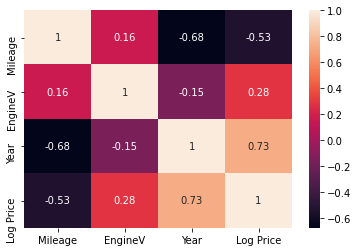

In [39]:
sns.heatmap(data_cleaned.corr(),annot=True)

#### 11A  Multicollinearity and Find the Multicollinearity variables in the Dataset. 


In [40]:
#multicollinearity occurs when there is corelation between the two or more independent variables with one another in regression model
#That means one independent variable can be predicted with other independent variable in regression analysis.
#This  is a problem if there is a multi collinearity we wouldnot distinguish between the effects of independent variables on dependent variable 
# Detecting multicollinearity using VIF(variance inflation factor)

#### 11B. variables which are having Multicollinearity.

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,4.595022,Mileage
1,14.306293,Year
2,12.958592,EngineV


In [42]:
# model is having too much of data which are not useful for analysis. even if creating dummies would make our model complicated.so dropping the column model
#Year is having VIF >10 so it is highly correlated. droping the column is better for our model building
#EngineV is also having VIF>10 so same as Year it is highly correlated. Droping the column for our better analysis

In [43]:
data_cleaned.drop('Year', axis=1,inplace=True)
data_cleaned.drop('EngineV', axis=1,inplace=True)
data_cleaned.drop('Model',axis=1,inplace=True)
data_cleaned.drop('Body',axis=1,inplace=True)
data_cleaned

,Brand,Mileage,Engine_type,Registration,Log Price
0,BMW,277,Petrol,yes,8.342840
1,Mercedes-Benz,427,Diesel,yes,8.974618
2,Audi,240,Petrol,yes,10.043249
3,Toyota,120,Petrol,yes,9.814656
4,Audi,200,Diesel,yes,9.560997
...,...,...,...,...,...
3341,Renault,152,Petrol,yes,8.824678
3342,Volkswagen,163,Diesel,yes,9.350102
3343,Toyota,35,Petrol,yes,9.792556
3344,BMW,1,Petrol,yes,8.779557


#### 10C. Perform Lable & One-Hot Encoding For the Categorical Variable

## creating dummy variables

In [44]:
#If we have N categories of features, we'll have to create N-1 dummies

In [45]:
data_dummies=pd.get_dummies(data_cleaned)
data_dummies.head()

,Mileage,Log Price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Engine_type_Diesel,Engine_type_Gas,Engine_type_Other,Engine_type_Petrol,Registration_no,Registration_yes
0,277,8.342840,0,1,0,0,0,0,0,0,0,0,1,0,1
1,427,8.974618,0,0,1,0,0,0,0,1,0,0,0,0,1
2,240,10.043249,1,0,0,0,0,0,0,0,0,0,1,0,1
3,120,9.814656,0,0,0,0,0,1,0,0,0,0,1,0,1
4,200,9.560997,1,0,0,0,0,0,0,1,0,0,0,0,1


In [46]:
data_dummies.columns

Index(['Mileage', 'Log Price', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Engine_type_Diesel',
       'Engine_type_Gas', 'Engine_type_Other', 'Engine_type_Petrol',
       'Registration_no', 'Registration_yes'],
      dtype='object')

In [47]:
data_dummies

,Mileage,Log Price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Engine_type_Diesel,Engine_type_Gas,Engine_type_Other,Engine_type_Petrol,Registration_no,Registration_yes
0,277,8.342840,0,1,0,0,0,0,0,0,0,0,1,0,1
1,427,8.974618,0,0,1,0,0,0,0,1,0,0,0,0,1
2,240,10.043249,1,0,0,0,0,0,0,0,0,0,1,0,1
3,120,9.814656,0,0,0,0,0,1,0,0,0,0,1,0,1
4,200,9.560997,1,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,152,8.824678,0,0,0,0,1,0,0,0,0,0,1,0,1
3342,163,9.350102,0,0,0,0,0,0,1,1,0,0,0,0,1
3343,35,9.792556,0,0,0,0,0,1,0,0,0,0,1,0,1
3344,1,8.779557,0,1,0,0,0,0,0,0,0,0,1,0,1


In [48]:
data_dummies['Log_Price']= data_dummies['Log Price']

data_dummies.drop(['Log Price'],axis=1,inplace=True)

In [49]:
data_dummies['M_Benz']=data_dummies['Brand_Mercedes-Benz']

In [50]:
data_dummies.drop(['Brand_Mercedes-Benz'],axis=1,inplace=True)

In [51]:
data_dummies.head()

,Mileage,Brand_Audi,Brand_BMW,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Engine_type_Diesel,Engine_type_Gas,Engine_type_Other,Engine_type_Petrol,Registration_no,Registration_yes,Log_Price,M_Benz
0,277,0,1,0,0,0,0,0,0,0,1,0,1,8.342840,0
1,427,0,0,0,0,0,0,1,0,0,0,0,1,8.974618,1
2,240,1,0,0,0,0,0,0,0,0,1,0,1,10.043249,0
3,120,0,0,0,0,1,0,0,0,0,1,0,1,9.814656,0
4,200,1,0,0,0,0,0,1,0,0,0,0,1,9.560997,0


### Model fit

#### 12A. Perform The Model fit & Model output using OLS 

In [52]:
import statsmodels.formula.api as smf
olsmodel=smf.ols(formula= 'Log_Price ~Mileage+Brand_BMW+M_Benz+Brand_Mitsubishi+Brand_Renault+Brand_Toyota+Brand_Volkswagen+Engine_type_Gas+Engine_type_Other+Engine_type_Petrol+Registration_yes+Registration_no',data=data_dummies).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     420.1
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:57:45   Log-Likelihood:                -2225.7
No. Observations:                3346   AIC:                             4475.
Df Residuals:                    3334   BIC:                             4549.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5959      0

#### 12B. Explain the Model Evaluation metrics in OLS method.

**Note:** Give The Explanation about R-square, Adjusted.R-Square and Explain the P-Value in OLS Table

#### 13A. Feature Selection using with Forward Selection

In [54]:
features = data_dummies.columns
for var in features:
    slrmodel=smf.ols(formula='Log_Price~{}'.format(var),data=data_dummies).fit()
    print("Log_Price ~{} {} {} {}". format(var,'\nP-Value:', np.round(slrmodel.pvalues[1],2),'\n----------------'))
    print(olsmodel.summary())

Log_Price ~Mileage 
P-Value: 0.0 
----------------
                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     420.1
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:57:45   Log-Likelihood:                -2225.7
No. Observations:                3346   AIC:                             4475.
Df Residuals:                    3334   BIC:                             4549.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     420.1
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:57:45   Log-Likelihood:                -2225.7
No. Observations:                3346   AIC:                             4475.
Df Residuals:                    3334   BIC:                             4549.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5959      0

strong multicollinearity problems or that the design matrix is singular.
Log_Price ~Engine_type_Petrol 
P-Value: 0.0 
----------------
                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     420.1
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:57:45   Log-Likelihood:                -2225.7
No. Observations:                3346   AIC:                             4475.
Df Residuals:                    3334   BIC:                             4549.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025 

strong multicollinearity problems or that the design matrix is singular.


In [55]:
features = list(data_dummies.columns[1:16])
olsmodel.pvalues
for var in features:
    slrmodel=smf.ols(formula='Log_Price~Mileage +{}'.format(var),data=data_dummies).fit()
    print("Log_Price~ Mileage+ {} {} {} {}". format(var,'\nP-Value:', np.round(slrmodel.pvalues,5),'\n----------------'))
    print(slrmodel.summary())

Log_Price~ Mileage+ Brand_Audi 
P-Value: Intercept     0.00000
Mileage       0.00000
Brand_Audi    0.01482
dtype: float64 
----------------
                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     670.7
Date:                Sun, 15 Aug 2021   Prob (F-statistic):          1.20e-245
Time:                        11:57:46   Log-Likelihood:                -3116.1
No. Observations:                3346   AIC:                             6238.
Df Residuals:                    3343   BIC:                             6257.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

----------------
                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     693.2
Date:                Sun, 15 Aug 2021   Prob (F-statistic):          1.47e-252
Time:                        11:57:46   Log-Likelihood:                -3100.1
No. Observations:                3346   AIC:                             6206.
Df Residuals:                    3343   BIC:                             6225.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.9105      0.

strong multicollinearity or other numerical problems.
Log_Price~ Mileage+ Engine_type_Petrol 
P-Value: Intercept             0.0
Mileage               0.0
Engine_type_Petrol    0.0
dtype: float64 
----------------
                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     686.1
Date:                Sun, 15 Aug 2021   Prob (F-statistic):          2.25e-250
Time:                        11:57:46   Log-Likelihood:                -3105.2
No. Observations:                3346   AIC:                             6216.
Df Residuals:                    3343   BIC:                             6235.
Df Model:                           2                                         
Covariance Type:            nonrobust                                      

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     726.7
Date:                Sun, 15 Aug 2021   Prob (F-statistic):          8.61e-263
Time:                        11:57:46   Log-Likelihood:                -3076.6
No. Observations:                3346   AIC:                             6159.
Df Residuals:                    3343   BIC:                             6177.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9543      0.022    446.767      0.0

In [85]:
features = list(data_dummies.columns[2:16])
olsmodel.pvalues
for var in features:
    slrmodel=smf.ols(formula='Log_Price~Mileage+Brand_Audi+Brand_BMW+M_Benz+Brand_Mitsubishi+Brand_Renault+Brand_Toyota+Brand_Volkswagen+{}'.format(var),data=data_dummies).fit()
    print("Price~ Mileage+{} {} {} {}". format(var,'\nP-Value:', np.round(slrmodel.pvalues,5),'\n----------------'))
    print(slrmodel.summary())

Price~ Mileage+Brand_BMW 
P-Value: Intercept           0.0
Mileage             0.0
Brand_Audi          0.0
Brand_BMW           0.0
M_Benz              0.0
Brand_Mitsubishi    0.0
Brand_Renault       0.0
Brand_Toyota        0.0
Brand_Volkswagen    0.0
dtype: float64 
----------------
                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     268.1
Date:                Sun, 15 Aug 2021   Prob (F-statistic):          1.30e-317
Time:                        12:48:28   Log-Likelihood:                -2934.3
No. Observations:                3346   AIC:                             5885.
Df Residuals:                    3338   BIC:                             5934.
Df Model:                           7                                         
Covar

strong multicollinearity problems or that the design matrix is singular.
Price~ Mileage+Brand_Volkswagen 
P-Value: Intercept           0.0
Mileage             0.0
Brand_Audi          0.0
Brand_BMW           0.0
M_Benz              0.0
Brand_Mitsubishi    0.0
Brand_Renault       0.0
Brand_Toyota        0.0
Brand_Volkswagen    0.0
dtype: float64 
----------------
                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     268.1
Date:                Sun, 15 Aug 2021   Prob (F-statistic):          1.30e-317
Time:                        12:48:28   Log-Likelihood:                -2934.3
No. Observations:                3346   AIC:                             5885.
Df Residuals:                    3338   BIC:                             5934.
Df M

Price~ Mileage+Engine_type_Other 
P-Value: Intercept            0.00000
Mileage              0.00000
Brand_Audi           0.00000
Brand_BMW            0.00000
M_Benz               0.00000
Brand_Mitsubishi     0.00000
Brand_Renault        0.00000
Brand_Toyota         0.00000
Brand_Volkswagen     0.00000
Engine_type_Other    0.01018
dtype: float64 
----------------
                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     235.8
Date:                Sun, 15 Aug 2021   Prob (F-statistic):          8.19e-318
Time:                        12:48:29   Log-Likelihood:                -2931.0
No. Observations:                3346   AIC:                             5880.
Df Residuals:                    3337   BIC:                             5935.
Df

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     493.4
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:48:29   Log-Likelihood:                -2374.5
No. Observations:                3346   AIC:                             4767.
Df Residuals:                    3337   BIC:                             4822.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.8192      0.031  

In [88]:
features = list(data_dummies.columns[3:16])
olsmodel.pvalues
for var in features:
    slrmodel=smf.ols(formula='Log_Price~Mileage+Brand_Audi+Brand_BMW+M_Benz+Brand_Mitsubishi+Brand_Renault+Brand_Toyota+Brand_Volkswagen+Engine_type_Diesel+Engine_type_Gas+Engine_type_Other+Engine_type_Petrol+{}'.format(var),data=data_dummies).fit()
    print("Price~ Mileage+{} {} {} {}". format(var,'\nP-Value:', np.round(slrmodel.pvalues,5),'\n----------------'))
    print(slrmodel.summary())

Price~ Mileage+Brand_Mitsubishi 
P-Value: Intercept             0.0
Mileage               0.0
Brand_Audi            0.0
Brand_BMW             0.0
M_Benz                0.0
Brand_Mitsubishi      0.0
Brand_Renault         0.0
Brand_Toyota          0.0
Brand_Volkswagen      0.0
Engine_type_Diesel    0.0
Engine_type_Gas       0.0
Engine_type_Other     0.0
Engine_type_Petrol    0.0
dtype: float64 
----------------
                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     204.8
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:55:28   Log-Likelihood:                -2879.5
No. Observations:                3346   AIC:                             5781.
Df Residuals:                    3

Price~ Mileage+Brand_Volkswagen 
P-Value: Intercept             0.0
Mileage               0.0
Brand_Audi            0.0
Brand_BMW             0.0
M_Benz                0.0
Brand_Mitsubishi      0.0
Brand_Renault         0.0
Brand_Toyota          0.0
Brand_Volkswagen      0.0
Engine_type_Diesel    0.0
Engine_type_Gas       0.0
Engine_type_Other     0.0
Engine_type_Petrol    0.0
dtype: float64 
----------------
                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     204.8
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:55:28   Log-Likelihood:                -2879.5
No. Observations:                3346   AIC:                             5781.
Df Residuals:                    3

Price~ Mileage+Registration_no 
P-Value: Intercept             0.0
Mileage               0.0
Brand_Audi            0.0
Brand_BMW             0.0
M_Benz                0.0
Brand_Mitsubishi      0.0
Brand_Renault         0.0
Brand_Toyota          0.0
Brand_Volkswagen      0.0
Engine_type_Diesel    0.0
Engine_type_Gas       0.0
Engine_type_Other     0.0
Engine_type_Petrol    0.0
Registration_no       0.0
dtype: float64 
----------------
                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     420.1
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:55:29   Log-Likelihood:                -2225.7
No. Observations:                3346   AIC:                             4475.
Df Residu

strong multicollinearity problems or that the design matrix is singular.
Price~ Mileage+M_Benz 
P-Value: Intercept             0.0
Mileage               0.0
Brand_Audi            0.0
Brand_BMW             0.0
M_Benz                0.0
Brand_Mitsubishi      0.0
Brand_Renault         0.0
Brand_Toyota          0.0
Brand_Volkswagen      0.0
Engine_type_Diesel    0.0
Engine_type_Gas       0.0
Engine_type_Other     0.0
Engine_type_Petrol    0.0
dtype: float64 
----------------
                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     204.8
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:55:29   Log-Likelihood:                -2879.5
No. Observations:                3346   AIC:      

In [89]:
features = list(data_dummies.columns[14:16])
olsmodel.pvalues
for var in features:
    slrmodel=smf.ols(formula='Log_Price~Mileage+Brand_Audi+Brand_BMW+M_Benz+Brand_Mitsubishi+Brand_Renault+Brand_Toyota+Brand_Volkswagen+Engine_type_Diesel+Engine_type_Gas+Engine_type_Other+Engine_type_Petrol+Registration_no+Registration_yes+{}'.format(var),data=data_dummies).fit()
    print("Price~ Mileage+{} {} {} {}". format(var,'\nP-Value:', np.round(slrmodel.pvalues,5),'\n----------------'))
    print(slrmodel.summary())

Price~ Mileage+M_Benz 
P-Value: Intercept             0.0
Mileage               0.0
Brand_Audi            0.0
Brand_BMW             0.0
M_Benz                0.0
Brand_Mitsubishi      0.0
Brand_Renault         0.0
Brand_Toyota          0.0
Brand_Volkswagen      0.0
Engine_type_Diesel    0.0
Engine_type_Gas       0.0
Engine_type_Other     0.0
Engine_type_Petrol    0.0
Registration_no       0.0
Registration_yes      0.0
dtype: float64 
----------------
                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     420.1
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:57:46   Log-Likelihood:                -2225.7
No. Observations:                3346   AIC:                           

#### 13B. Feature Selection using with Backward Selection

In [75]:
olsmodel2=smf.ols(formula='Log_Price ~ Mileage+Brand_Audi+Brand_BMW+Brand_Mitsubishi+Brand_Renault+Brand_Toyota+Brand_Volkswagen+Engine_type_Diesel+Engine_type_Gas+Engine_type_Other+Engine_type_Petrol+Registration_no+Registration_yes',data=data_dummies).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     420.1
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:32:55   Log-Likelihood:                -2225.7
No. Observations:                3346   AIC:                             4475.
Df Residuals:                    3334   BIC:                             4549.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.4915      0

In [78]:
olsmodel2=smf.ols(formula='Log_Price ~ Mileage+Brand_Audi+Brand_BMW+Brand_Mitsubishi+Brand_Renault+Brand_Toyota+Brand_Volkswagen+Engine_type_Diesel+Engine_type_Gas+Engine_type_Other+Engine_type_Petrol',data=data_dummies).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     204.8
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:37:07   Log-Likelihood:                -2879.5
No. Observations:                3346   AIC:                             5781.
Df Residuals:                    3335   BIC:                             5848.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.1695      0

In [79]:
olsmodel2=smf.ols(formula='Log_Price ~ Mileage+Brand_Audi+Brand_BMW+Brand_Mitsubishi+Brand_Renault+Brand_Toyota+Brand_Volkswagen',data=data_dummies).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     268.1
Date:                Sun, 15 Aug 2021   Prob (F-statistic):          1.30e-317
Time:                        12:38:46   Log-Likelihood:                -2934.3
No. Observations:                3346   AIC:                             5885.
Df Residuals:                    3338   BIC:                             5934.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           10.2473      0.035  

In [80]:
olsmodel2=smf.ols(formula='Log_Price ~ Mileage',data=data_dummies).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     1334.
Date:                Sun, 15 Aug 2021   Prob (F-statistic):          5.12e-246
Time:                        12:39:26   Log-Likelihood:                -3119.1
No. Observations:                3346   AIC:                             6242.
Df Residuals:                    3344   BIC:                             6254.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9627      0.023    441.940      0.0

#### 14. Explain about Assumption of errors and predictors


In [ ]:
#Linearity

#The independend variables have a linear relationship with dependend variable

#Multi colinearity

#There should no colinearity between independend variables/predictors

#Normality of Errors

#The errors arenormally distributed

#Homoscedacity

#points are of same distance from the lline
#Hetroscedacity

#points are not of same distance from the line

#### 15B. Perform the Linear Regression Model fit using Sklearn.

In [91]:
y=data_dummies['Log_Price']
x=data_dummies.drop(['Log_Price'],axis=1)

# scaling the data

In [92]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(x)

inputs_scaled = scaler.transform(x)

#### 15A. Split The Dataset into Train and Test (80:20) using Sklearn

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [ ]:
##creating a regression

In [94]:

from sklearn.linear_model import LinearRegression
lrmodel=LinearRegression()
lrmodel.fit(x_train,y_train)

LinearRegression()

In [95]:
y_hat=lrmodel.predict(x_train)

C:\Users\shravya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


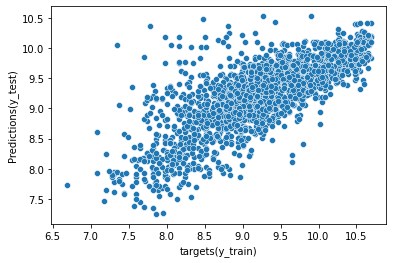

In [96]:
sns.scatterplot(y_train, y_hat)
plt.xlabel('targets(y_train)')
plt.ylabel('Predictions(y_test)')
plt.show()

C:\Users\shravya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


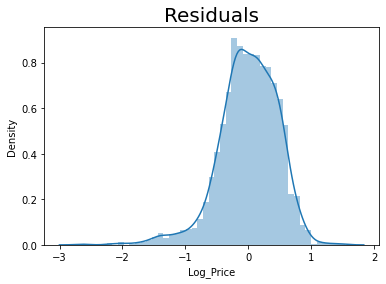

In [97]:
sns.distplot(y_train - y_hat)
plt.title('Residuals', size=20)
plt.show()

In [ ]:
## The residuals are the estimates of the errors, our residuals are normally distributed, mean seems to be zero but there's much longer tail in the negative side because, there are certain observations for which y_train - y_test is much lower than the mean(a much higher price is predicted than the observed)

In [98]:
lrmodel.score(x_train, y_train)

0.5784524313961565

In [ ]:
#Our model is explaining the 65% of the variability.

In [ ]:
#Finding the weights and bias
#The bias s contained in intercept, so finding intercept:

In [99]:
lrmodel.intercept_

9.447667787720015

In [ ]:
#The weights are contained n coefficients

In [100]:
lrmodel.coef_


array([-0.00411478,  0.21046192,  0.29639435, -0.18000652, -0.52145845,
        0.17917651, -0.12734031,  0.20990972, -0.05290596, -0.02017152,
       -0.13683224, -0.57515587,  0.57515587,  0.14277249])

In [101]:
lrmodel_summary = pd.DataFrame(x.columns.values, columns = ['Features'])
lrmodel_summary['Weights'] = lrmodel.coef_
lrmodel_summary

,Features,Weights
0,Mileage,-0.004115
1,Brand_Audi,0.210462
2,Brand_BMW,0.296394
3,Brand_Mitsubishi,-0.180007
4,Brand_Renault,-0.521458
5,Brand_Toyota,0.179177
6,Brand_Volkswagen,-0.127340
7,Engine_type_Diesel,0.209910
8,Engine_type_Gas,-0.052906
9,Engine_type_Other,-0.020172


#### 15C. Lasso Regression and Perform the Lasso Regression

In [102]:

from sklearn.linear_model import Lasso

In [103]:
LS =Lasso(alpha =0.01)
LS.fit(x_train,y_train)
LS.fit(x_test,y_test)

Lasso(alpha=0.01)

In [104]:
LS.score(x_train,y_train)

0.562277543659374

In [105]:
LS.score(x_test,y_test)

0.5756034103667171

#### 15D. Ridge Regression and Perform the Ridge Regression

In [106]:

from sklearn.linear_model import Ridge

In [107]:
RD = Ridge(alpha=1)
RD.fit(x_train,y_train)
RD.fit(x_test,y_test)

Ridge(alpha=1)

In [108]:
RD.score(x_train,y_train)

0.5726912211847699

In [109]:
RD.score(x_test,y_test)

0.5897692761552232

###  Conclusions about the Model fits for What you Observe.

In [ ]:
## summary about regression

In [ ]:
## testing

C:\Users\shravya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


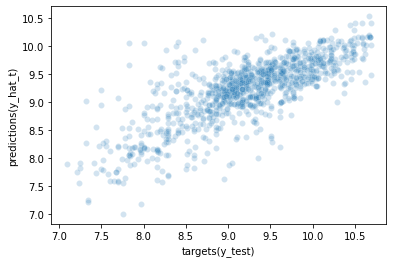

In [110]:
y_hat_t = lrmodel.predict(x_test)

sns.scatterplot(y_test, y_hat_t, alpha=0.2)
plt.xlabel('targets(y_test)')
plt.ylabel('predictions(y_hat_t)')
plt.show()


In [ ]:
##For higher prices, we have higher concentration of values, therefore, our model is very good at predicting the higher price but for the lower prices, it is much more scattered. Our model is much more close to the 45 degree line. The more saturated the colors,the higher the concentration.

In [111]:
df_pf = pd.DataFrame(np.exp(y_hat_t).round(2), columns = ['Prediction'])
df_pf.head()

,Prediction
0,7219.57
1,10010.46
2,9661.43
3,8844.77
4,22138.58


In [112]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,7219.57,4200.0
1,10010.46,NaN
2,9661.43,NaN
3,8844.77,18300.0
4,22138.58,NaN


In [113]:
y_test = y_test.reset_index(drop=True) # Resetting the original indexes
y_test.head()

0    8.575462
1    9.099409
2    9.047821
3    9.468851
4    8.377931
Name: Log_Price, dtype: float64

In [114]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,7219.57,5300.0
1,10010.46,8950.0
2,9661.43,8500.0
3,8844.77,12950.0
4,22138.58,4350.0


In [115]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [116]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)

In [117]:
df_pf.sort_values('Difference%')


,Prediction,Target,Residual,Difference%
797,11898.96,11900.0,1.04,0.008739
370,8902.24,8900.0,-2.24,0.025169
494,23974.16,24000.0,25.84,0.107667
318,17479.91,17500.0,20.09,0.114800
870,5292.19,5300.0,7.81,0.147358
...,...,...,...,...
803,8263.66,1500.0,-6763.66,450.910667
951,9948.31,1800.0,-8148.31,452.683889
134,15614.42,2500.0,-13114.42,524.576800
896,23030.95,2999.0,-20031.95,667.954318


In [ ]:

## Conclusion: We've got around 65% accuracy. On average our model is pretty decent at predicting the price of the car.